In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_excel('data/Data_.xlsx')

# Split the data into features (X) and target (y)
X = data.drop(columns=['EC'])
y = data['EC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional for Random Forest but recommended for consistency)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the training and testing sets
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


(57, 5) (15, 5) (57,) (15,)


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the Random Forest model structure
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, warm_start=True)

# Initialize lists to store metrics
train_losses = []
val_losses = []
train_maes = []
val_maes = []

# Custom training loop
n_epochs = 5000
for epoch in range(1, n_epochs + 1):
    rf_model.n_estimators = epoch  # Increment the number of trees
    rf_model.fit(X_train_scaled, y_train)  # Fit the model

    # Predictions
    y_train_pred = rf_model.predict(X_train_scaled)
    y_val_pred = rf_model.predict(X_test_scaled)

    # Calculate loss and MAE
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_test, y_val_pred)

    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_maes.append(train_mae)
    val_maes.append(val_mae)

    # Print metrics for the epoch
    print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Train MAE = {train_mae:.4f}, "
          f"Val Loss = {val_loss:.4f}, Val MAE = {val_mae:.4f}")


Epoch 1: Train Loss = 389529.6627, Train MAE = 315.0907, Val Loss = 1290862.5760, Val MAE = 986.8820
Epoch 2: Train Loss = 228009.0313, Train MAE = 277.9842, Val Loss = 915289.6115, Val MAE = 754.6573
Epoch 3: Train Loss = 136898.1084, Train MAE = 233.2351, Val Loss = 772580.5394, Val MAE = 664.3282
Epoch 4: Train Loss = 125774.3338, Train MAE = 229.1379, Val Loss = 722050.1333, Val MAE = 641.8488
Epoch 5: Train Loss = 102267.2060, Train MAE = 212.8913, Val Loss = 703201.1671, Val MAE = 631.4067
Epoch 6: Train Loss = 115085.5967, Train MAE = 238.3149, Val Loss = 758185.8798, Val MAE = 642.9808
Epoch 7: Train Loss = 117295.6694, Train MAE = 243.6188, Val Loss = 736470.6998, Val MAE = 633.2499
Epoch 8: Train Loss = 105550.6740, Train MAE = 239.3836, Val Loss = 709965.7665, Val MAE = 650.0313
Epoch 9: Train Loss = 103125.5550, Train MAE = 233.2027, Val Loss = 679428.3993, Val MAE = 649.8727
Epoch 10: Train Loss = 107468.6804, Train MAE = 248.4262, Val Loss = 702277.8222, Val MAE = 664.726

In [3]:
import joblib

# Save the model
joblib.dump(rf_model, 'models/rf_model.joblib')


['models/rf_model.joblib']

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
y_pred_rf = rf_model.predict(X_test_scaled)
y_train_pred_rf = rf_model.predict(X_train_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'MSE: {mse_rf}, R²: {r2_rf}')


MSE: 557371.0124903198, R²: 0.8900388697072894


In [11]:
# Export actual vs. predicted values to CSV and Excel files
results_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
results_train_rf = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_rf})



# Save to Excel
results_rf.to_excel('results/actual_vs_predicted_test_rf.xlsx', index=False)
results_train_rf.to_excel('results/actual_vs_predicted_train_rf.xlsx', index=False)


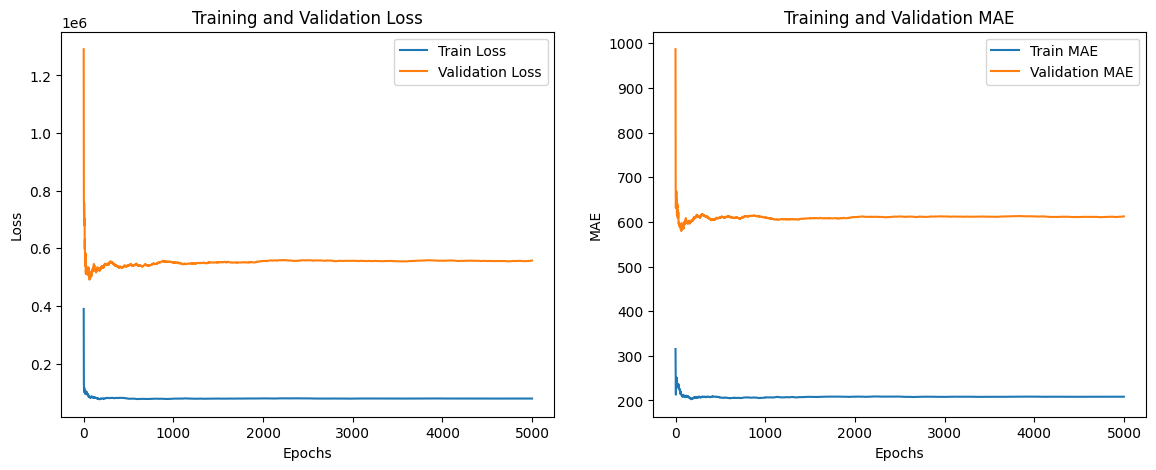

In [12]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(train_maes, label='Train MAE')
plt.plot(val_maes, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')

plt.show()


In [7]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae_rf}')


Mean Absolute Error: 612.3485359921241


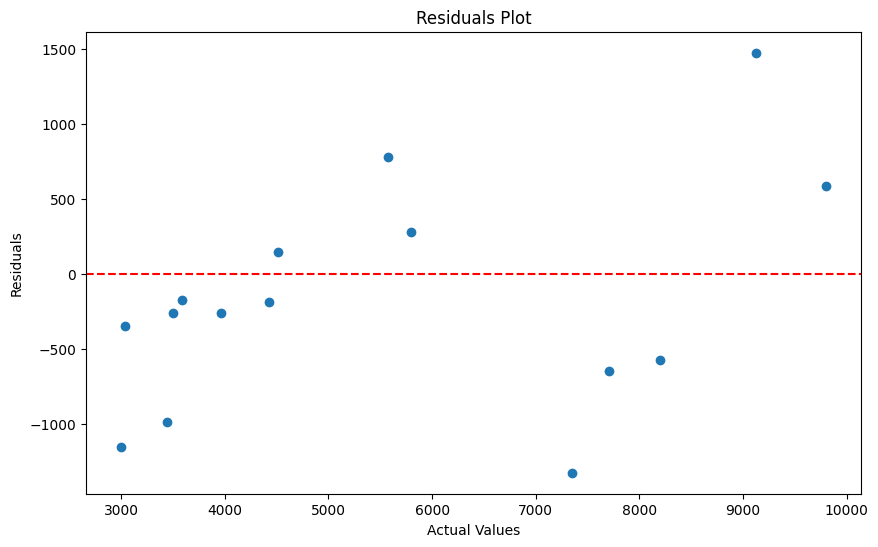

In [8]:
# Plot residuals
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


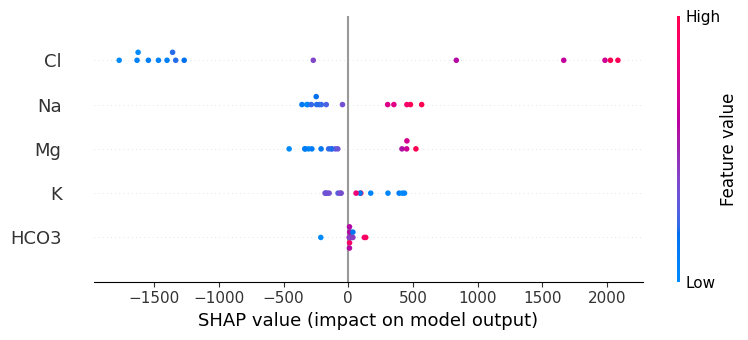

In [9]:
import shap

# Explain the model predictions using SHAP
explainer_rf = shap.Explainer(rf_model)
shap_values_rf = explainer_rf(X_test_scaled)

# Plot SHAP summary
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns)
